Goals:

* Understand the important roles of activation function in deep neural network
* Understand the difficulty of training a neural network
* Implement your first recurrent neural network
* Familar with the procedure for training and evaluating your deep learning model


In [58]:
# All libraries we use for this HW, run this block first!
#%tensorflow_version 2.x
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
#import torch
from matplotlib import pyplot as plt
from sklearn import datasets, neural_network
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
np.random.seed(8)

# Question 1: The _"Fantastic activation functions and where to find them"_


### **a)** Finish the implementation of each activation function and their derivative.

Sigmoid function: $f(x) = \frac{1}{1+e^{-x}}$

Tanh function: $f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

ReLU (or rectifier) function: description at [Delving Deep into Rectifiers:
Surpassing Human-Level Performance on ImageNet Classification](https://www.cv-foundation.org/openaccess/content_iccv_2015/papers/He_Delving_Deep_into_ICCV_2015_paper.pdf) (NOTE: you only need ReLU, not PReLU or LReLU)

Mish function: description at ["Mish: A Self Regularized Non-Monotonic Neural Activation Function"](https://arxiv.org/pdf/1908.08681.pdf)

In [59]:
# I completed the following parts according to the mathematical formulas which are provided in the sources.

def sigmoid(x):
    s=1/(1+np.exp(-x))
    return s

def derivative_sigmoid(x):
    s=1/(1+np.exp(-x))
    ds=s*(1-s)
    return ds

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t

def derivative_tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return dt

def relu(x):
    return x * (x > 0)

def derivative_relu(x):
    return 1. * (x > 0)

def mish(x):
    return x*tanh( np.log( 1+ np.exp( x ) ) )


def derivative_mish(x):
    w=4*( x+1 )+4*np.exp(2*x)+np.exp(3*x)+np.exp(x)*(4*x+6)
    s=2*np.exp(x)+np.exp(2*x)+2
    z=(np.exp(x)*w)/(s*s)
    return z



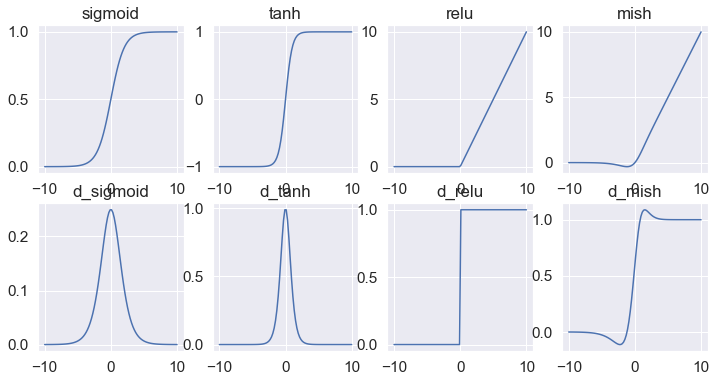

In [60]:
#@title Run this block to debug your functions
activation = ['sigmoid', 'tanh', 'relu', 'mish']
n = len(activation)
x = np.linspace(-10, 10, num=100)
plt.figure(figsize=(12, 6))
for i, name in enumerate(activation):
  try:
    y = locals()[name](x)
    dy_x = locals()['derivative_' + name](x)
  except:
    try:
      y = locals()[name](torch.from_numpy(x))
      dy_x = locals()['derivative_' + name](torch.from_numpy(x))
    except:
      try:
        y = locals()[name](tf.convert_to_tensor(x))
        dy_x = locals()['derivative_' + name](tf.convert_to_tensor(x))
      except:
        pass
  if hasattr(y, 'numpy'):
    y = y.numpy()
  if hasattr(dy_x, 'numpy'):
    dy_x = dy_x.numpy()
    
  plt.subplot(2, n, i + 1)
  if y is not None:
    plt.plot(x, y)
  plt.grid(True)
  plt.title(name)

  plt.subplot(2, n, i + n + 1)
  if dy_x is not None:
    plt.plot(x, dy_x)
  plt.grid(True)
  plt.title('d_' + name)

### **b)** Selecting the appropriate activation function for the following multilayer perceptron

In [61]:
X, y = datasets.load_wine(return_X_y=True)
mlp = neural_network.MLPClassifier(activation='logistic')
mlp.fit(X, y)
print("Accuracy:", accuracy_score(y_true=y, y_pred=mlp.predict(X)))
# You must be able to get > 90% accuracy for this task

Accuracy: 0.949438202247191


C:\Users\pc\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [62]:
X, y = datasets.load_boston(return_X_y=True)
mlp = neural_network.MLPRegressor(activation='relu')
mlp.fit(X, y)
print("MSE:", mean_squared_error(y_true=y, y_pred=mlp.predict(X)))
# you must be able to get MSE < 30 for this task

MSE: 27.849020204988122


# Question 2: _The curious case of vanishing gradients_

Finish the implementation of `recurrent_neural_network` (i.e. filling in the **TODO** line in the code)

Then, run the following code block with two different `activation` for the function `recurrent_neural_network` (i.e. line 42)

* `outputs = recurrent_neural_network(X, activation=torch.sigmoid)`
* and `outputs = recurrent_neural_network(X, activation=lambda x: x)` (i.e. the _identity function_)

Answer the following question:

*   Explain what wrong with the gradients of the parameters ($W_h$, $W_x$, and $bias$).
*   What is the solution for these issues? 

Modifying the code according to your solution

**TIPS**: check out these _cool_ papers

*   [Understanding the difficulty of training deep feedforward neural networks](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
*   [On the difficulty of training recurrent neural networks](http://proceedings.mlr.press/v28/pascanu13.pdf)
*   [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)


**NOTE**: the recurrent neural network is implemented as following.

![alt text](https://drive.google.com/uc?export=view&id=1SMpJWb0h5ElMfXYdRnd0Gu6OsmPKwy-c)


Training  Epoch#0  Loss: 0.5794
Training  Epoch#10  Loss: 0.6273
Training  Epoch#20  Loss: 0.6782
Training  Epoch#30  Loss: 0.7440
Training  Epoch#40  Loss: 0.7599
Training  Epoch#50  Loss: 0.7680
Training  Epoch#60  Loss: 0.7774
Training  Epoch#70  Loss: 0.7933
Training  Epoch#80  Loss: 0.8203
Training  Epoch#90  Loss: 0.8500
Training  Epoch#100  Loss: 0.8847
Training  Epoch#110  Loss: 0.8933
Training  Epoch#120  Loss: 0.8981
Training  Epoch#130  Loss: 0.9083
Training  Epoch#140  Loss: 0.9329
Training  Epoch#150  Loss: 0.9488
Training  Epoch#160  Loss: 0.9543
Training  Epoch#170  Loss: 0.9579
Training  Epoch#180  Loss: 0.9631
Training  Epoch#190  Loss: 0.9708


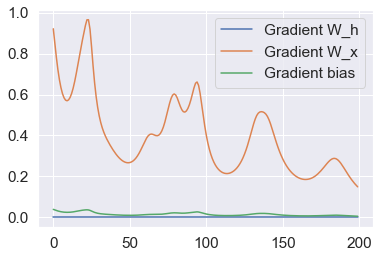

In [63]:
#@title If you are more familiar with tensorflow, use this block (double click to expand the code)

hidden_units = 8
n_samples = 12
n_time = 128
n_features = 18

# just randomize data for our optimization
X = tf.convert_to_tensor(
    12 * np.random.rand(n_samples, n_time, n_features).astype('float32'))
target = tf.convert_to_tensor(
    np.random.randint(0, 10, size=(n_samples,)).astype('float32'))

# initialize the weight and bias
init = tf.initializers.glorot_normal()
W_h = tf.Variable(init((hidden_units, hidden_units)), trainable=True)
W_x = tf.Variable(init((hidden_units, n_features)), trainable=True)
bias = tf.Variable(np.zeros((hidden_units, 1)).astype('float32'),
                   trainable=True)


def recurrent_neural_network(x, activation):

  # x : [number_of_samples, time_dimension, number_of_features]
  n_samples, n_timedim, n_features = x.shape
  # initial the first state at time step zero
  h0 = tf.zeros((n_samples, hidden_units))

  h = h0
  #print(h0.shape)12,8
  #print(h.shape)
  #print(W_x.shape)8,18
  #print(W_h.shape)8,8
  #print(x.shape())#8,18
  #loop all over time-steps

  for time_step in tf.range(0, x.shape[1]-1):
    #update the next hidden state, compute the prediction,get the cache
    h=tf.tanh( tf.transpose(tf.matmul(h0,W_h))+tf.matmul(W_x,tf.transpose(x[:,time_step]))+bias)
    h0=h
    #S[:,k+1] = update_state(X[:,k], S[:,k], wx, wRec)
    #save the value of the next hidden state
    #save the value of the prediction
    #append cache to caches


    # TODO: finish the implementation of recurrent neural network here,
    # make sure the final output `h` has shape [n_samples, hidden_units]
    # we only need the last time step for classification task
    
    return h


#### Create the optimizer training our RNN
optimizer = tf.optimizers.SGD(learning_rate=0.01)

grad_Wh = []
grad_Wx = []
grad_bias = []
for epoch in range(200):  # loop over the dataset multiple times
  #
  with tf.GradientTape() as tape:
    outputs = recurrent_neural_network(X, activation=tf.sigmoid)
    # just some dummy loss function
    loss = tf.reduce_mean(outputs)
  grads = tape.gradient(loss, [W_h, W_x, bias])
  optimizer.apply_gradients(
      grads_and_vars=[(g, v) for g, v in zip(grads, [W_h, W_x, bias])])
  # record the gradients of the parameters for plotting
  grad_Wh.append(tf.norm(grads[0]))
  grad_Wx.append(tf.norm(grads[1]))
  grad_bias.append(tf.norm(grads[2]))
  if epoch % 10 == 0:
    print("Training  Epoch#%d  Loss: %.4f" % (epoch, -1*loss.numpy()))

# visualize the gradient of the parameters during learning process.
plt.plot(grad_Wh, label='Gradient W_h')
plt.plot(grad_Wx, label='Gradient W_x')
plt.plot(grad_bias, label='Gradient bias')
plt.legend()

# Question 3: _Getting pragmatic_ - BP Neural network-based recognizing handwritten digits

**TIPS**: The following paper contains all the useful tricks for training neural network [Efficient Backprop](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

**NOTE**: you must be able to get > 90% accuracy on **test data** for this task.

Image: (1797, 64)
Label: (1797,)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


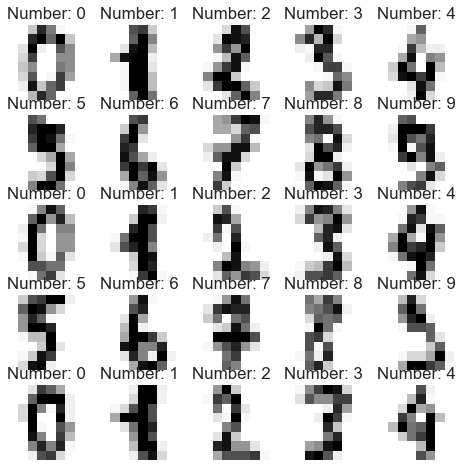

In [64]:
X, y = datasets.load_digits(return_X_y=True)
print("Image:", X.shape)
print("Label:", y.shape)
print(X[0].reshape(8, 8))

### Visualizing the training image
n = 0
plt.figure(figsize=(8, 8))
for i in range(5):
  for j in range(5):
    plt.subplot(5, 5, i * 5 + j + 1)
    plt.imshow(X[n].reshape(8, 8), cmap='Greys')
    plt.axis('off')
    plt.title("Number: %d" % y[n])
    n += 1

### **a)** Data preparation
Following the procedure in the following figure and split the given dataset appropriately!
![alt text](https://drive.google.com/uc?export=view&id=1gxet_ertq-yYiQLB9-PrCwoY_f8vF2HT)


In [65]:
# TODO: Your code for splitting the dataset
#Splitiing datset on training (80%) and testing (20%) dataset
from sklearn.model_selection import train_test_split
import tensorflow as tf

#First we are gonna split the whole dataset( X, y) train/test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#Second we are gonna split the X_trin and y_train datasets train/valid.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

print( X_train.shape )
print( X_test.shape  )
print( X_valid.shape )
print( y_train.shape )
print( y_test.shape  )
print( y_valid.shape )

'''
X_train=tf.Variable(X_train, dtype=tf.float32, shape=(1149,64))
X_test=tf.Variable(X_test, dtype=tf.float32, shape=(360,64))
X_valid=tf.Variable(X_valid, dtype=tf.float32, shape=(288,64))

y_train=tf.Variable(y_train, dtype=tf.float32, shape=(1149,))
y_test=tf.Variable(y_test, dtype=tf.float32, shape=(360,))
y_valid=tf.Variable(y_valid, dtype=tf.float32, shape=(288,))

'''
#y_train=y_train.reshape(1149,1)
#y_test=y_test.reshape(360,1)
#y_valid=y_valid.reshape(288,1)

#we can see the variable's sizes by using .shape

print( X_train.shape )
print( X_test.shape  )
print( X_valid.shape )
print( y_train.shape )
print( y_test.shape  )
print( y_valid.shape )

(1149, 64)
(360, 64)
(288, 64)
(1149,)
(360,)
(288,)
(1149, 64)
(360, 64)
(288, 64)
(1149,)
(360,)
(288,)


### **b)** Using the back-propagation algorithm, design a multi-layer perceptron that classifiying the digit images.

In [66]:
import keras
from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/
from keras.layers.core import Dense, Dropout, Activation
import numpy as np
from keras.utils import np_utils



def create_network():
    #Build the model object
    model = tf.keras.models.Sequential()
    # Add the Flatten Layer
    model.add(tf.keras.layers.Flatten())
    # Build the input and the hidden layers
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    # Build the output layer
    model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

    
    
    return model

def train_network(network,X_train,y_train,x_valid,y_valid,n_epoch,batch_size):
    n_iter = 0
    opt = tf.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
    # Compile the model
    network.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    for epoch in range(n_epoch):
      for batch in range(0, X_train.shape[0], batch_size):
          n_iter += 1
          # minibatch data
          X = X_train[batch:batch + batch_size]
          y = y_train[batch:batch + batch_size]
          network.fit( X, y, epochs=10, verbose=1,  validation_split=0.2 )
          
      if n_iter % 20 == 0:
         y_valid_pred = network(X_valid)
         y_valid_pred = np.argmax(y_valid_pred.numpy(), axis=1)
         print("Training Loss:", loss.numpy(), "Validation Acc:",
              accuracy_score(y_true=y_valid, y_pred=y_valid_pred))
    return network
    
net = create_network()
net = train_network( net, X_train, y_train, X_valid, y_valid, 1 ,256  )
# Evaluate the model performance
#test_loss, test_acc = net.evaluate(x=X_valid, y=y_valid)
# Print out the model accuracy 
#print('\nTest loss, Test accuracy: ', test_loss, test_acc,'\n' )
# Start training process


# evaluate on test set:
y_test_pred = net(X_test)
y_test_pred = np.argmax(y_test_pred.numpy(), axis=1)
print("Test Acc:", accuracy_score(y_true=y_test, y_pred=y_test_pred))


Train on 204 samples, validate on 52 samples
Epoch 1/10
204/204 [==============================] - 1s 5ms/sample - loss: 3.4202 - accuracy: 0.2108 - val_loss: 2.5501 - val_accuracy: 0.2692
Epoch 2/10
204/204 [==============================] - 0s 396us/sample - loss: 1.2180 - accuracy: 0.6225 - val_loss: 0.9493 - val_accuracy: 0.6538
Epoch 3/10
204/204 [==============================] - 0s 386us/sample - loss: 0.6418 - accuracy: 0.8235 - val_loss: 0.7760 - val_accuracy: 0.7308
Epoch 4/10
204/204 [==============================] - 0s 347us/sample - loss: 0.4709 - accuracy: 0.8922 - val_loss: 0.5489 - val_accuracy: 0.8077
Epoch 5/10
204/204 [==============================] - 0s 381us/sample - loss: 0.3667 - accuracy: 0.8971 - val_loss: 0.4954 - val_accuracy: 0.8269
Epoch 6/10
204/204 [==============================] - 0s 386us/sample - loss: 0.2820 - accuracy: 0.9461 - val_loss: 0.5993 - val_accuracy: 0.7885
Epoch 7/10
204/204 [==============================] - 0s 631us/sample - loss: 0.2

Test Acc: 0.9555555555555556


(360,)


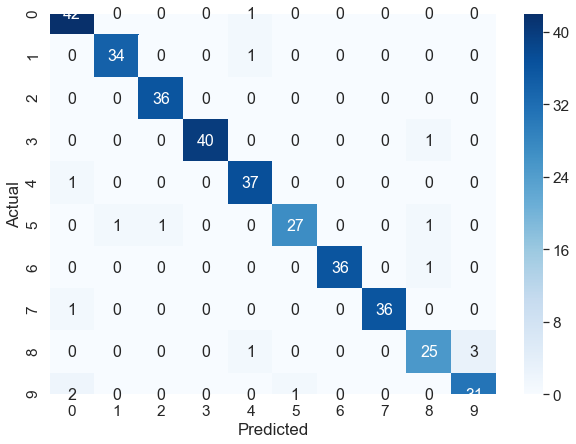

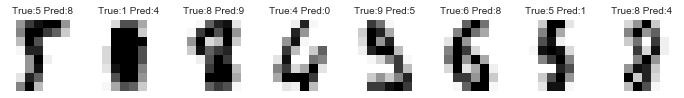

In [67]:
#@title Run this block to debug your network
if 'y_test_pred' in locals() and 'y_test' in locals():
  ### showing the confusion matrix
  data = confusion_matrix(y_test, y_test_pred)
  df_cm = pd.DataFrame(data,
                       columns=np.unique(y_test),
                       index=np.unique(y_test_pred))
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.figure(figsize=(10, 7))
  sns.set(font_scale=1.4)  #for label size
  sns.heatmap(df_cm, cmap="Blues", annot=True,
              annot_kws={"size": 16})  # font size

  ### showing the misclassified cases
  indices = y_test_pred != y_test
  print( indices.shape )
  X_samples = X_test[indices].reshape(-1,8,8)
  
  y_samples_true = y_test[indices]
  
  y_samples_pred = y_test_pred[indices]
  
  plt.figure(figsize=(12, 4))
  for i in range(8):
    plt.subplot(1, 8, i + 1)
    if i + 1 < len(indices):
      plt.imshow(X_samples[i], cmap='Greys')
      plt.axis('off')
      plt.title("True:%d Pred:%d" % (y_samples_true[i], y_samples_pred[i]),
                fontsize=10)
   

### **c)** Use the normalization technique (pre-processing and post-processing) to speed up the training procedure, and make a comparison with the non-normalization approach.

In [68]:
# TODO: Normalize X_train, X_valid, X_test here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Normalization by using tensorflow keras background

# Normalize the train dataset
x_train = tf.keras.utils.normalize( X_train, axis=1 )

# Normalize the test dataset
x_test = tf.keras.utils.normalize( X_test, axis=1 )
# Normalize the validation dataset
x_valid = tf.keras.utils.normalize(X_valid, axis=1 )

net_normalized = create_network()
net_normalized = train_network( net_normalized , X_train, y_train, X_valid, y_valid, 1 ,256  )

# evaluate on test set:
y_test_pred = net(X_test)
y_test_pred = np.argmax(y_test_pred.numpy(), axis=1)
print("Test Acc:", accuracy_score(y_true=y_test, y_pred=y_test_pred))

# create another network and re-train with pre-processed X_train here

Train on 204 samples, validate on 52 samples
Epoch 1/10
204/204 [==============================] - 1s 4ms/sample - loss: 4.1067 - accuracy: 0.1961 - val_loss: 1.6416 - val_accuracy: 0.4423
Epoch 2/10
204/204 [==============================] - 0s 386us/sample - loss: 1.2159 - accuracy: 0.5833 - val_loss: 1.0656 - val_accuracy: 0.6538
Epoch 3/10
204/204 [==============================] - 0s 372us/sample - loss: 0.7508 - accuracy: 0.7647 - val_loss: 1.0083 - val_accuracy: 0.6346
Epoch 4/10
204/204 [==============================] - 0s 386us/sample - loss: 0.5793 - accuracy: 0.8284 - val_loss: 0.7518 - val_accuracy: 0.7115
Epoch 5/10
204/204 [==============================] - 0s 396us/sample - loss: 0.4424 - accuracy: 0.8873 - val_loss: 0.6831 - val_accuracy: 0.7500
Epoch 6/10
204/204 [==============================] - 0s 411us/sample - loss: 0.3724 - accuracy: 0.9314 - val_loss: 0.5751 - val_accuracy: 0.8077
Epoch 7/10
204/204 [==============================] - 0s 381us/sample - loss: 0.3

<b> Comparison </b>

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

When we normalize the data we can get more rational values as a loss and accuracy.But the primary disadvantage of normalization is slower reporting performance. 

### **d)** Changing the learning rate, examine the over-fitting and under-fitting problems based on the given data.

Does the training progress reflecting this figure?
![alt text](https://drive.google.com/uc?export=view&id=1821jDmIMFRv_5EBboK4Q1ennKRYXXyKo)


<b>Selection of Learning Rate</b>

In Figure (a) if we choose the learning rate too high, then it means that we are updating weights very effectively each time so that there is a probability of overshooting the minimum cost.In the red line at one point we had the minimum cost and then cost started to increase.So, since we run so fast we missed the point that cost takes the minimum value.

If we choose so low then reaching the minimum cost point may take a lot time, as it can be seen in the Figure (a) it is slowly approaching the minimum cost value point.

So, if we make a good choice, then we can reach the minimum cost value at an optimum speed and time.

----------------------------------------------------------------------------------------------------------------------

<b>Underfitting vs. Overfitting</b>

In Figure (b) Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. Underfitting refers to a model that can neither model the training data nor generalize to new data.An underfit machine learning model is not a suitable model and will be obvious as it will have poor performance on the training data.

According to the given graph, in the underfitting case training set and validation set errors are both decreasing and low ; in the overfitting case validation set's error is getting high and training set's error is getting lower.


### **e)** Faster training algorithms.

The following gif shows how different optimizers escaping the _"saddle surface"_. 

This _"saddle"_ shape poses much greater challenge to deep learning compared to the local optima, since with sufficient amount of data (i.e. big data), the optimizer could _"jump"_ out of local optima. [(Lecun et al. 2015. Deep learning)](https://www.cs.toronto.edu/~hinton/absps/NatureDeepReview.pdf)

However, to escape the saddle, the optimizer must wisely change the direction.
![alt text](https://drive.google.com/uc?export=view&id=1B_QsIBmcz7zoRdYvmYCzpA21jdti6Sld)

Try at least three different training algorithms, includes:

* fast training algorithm with momentum
* fast training algorithm with adaptive learning rate

Report if your observation matching the video.

In [69]:
# TODO: Your code here, change the optimizer then re-run your training procedure, 
# and report the differences.

#I created three different network training methods for each optimization technique.And I also created three different
#lists to keep accuracy scores inside of them.

val_momentum=[]
val_adam=[]
val_adadelta=[]


def train_network_momentum(network,X_train,y_train,x_valid,y_valid,n_epoch,batch_size):
    
    opt = tf.optimizers.SGD(learning_rate=0.01, momentum=0.1, nesterov=False)
    # Compile the model
    network.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    for epoch in range(n_epoch):
      for batch in range(0, X_train.shape[0], batch_size):
          
          # minibatch data
          X = X_train[batch:batch + batch_size]
          y = y_train[batch:batch + batch_size]
          network.fit( X, y, epochs=10, verbose=1,  validation_split=0.2 )
          
      
          y_valid_pred = network(X_valid)
          y_valid_pred = np.argmax(y_valid_pred.numpy(), axis=1)
          #print( accuracy_score(y_true=y_valid, y_pred=y_valid_pred)  )
          val_momentum.append( accuracy_score(y_true=y_valid, y_pred=y_valid_pred) )
    return network

def train_network_Adam(network,X_train,y_train,x_valid,y_valid,n_epoch,batch_size):

    opt = tf.optimizers.Adam(learning_rate=0.01)
    # Compile the model
    network.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    for epoch in range(n_epoch):
      for batch in range(0, X_train.shape[0], batch_size):
         
          # minibatch data
          X = X_train[batch:batch + batch_size]
          y = y_train[batch:batch + batch_size]
          network.fit( X, y, epochs=10, verbose=1,  validation_split=0.2 )
          
    
          y_valid_pred = network(X_valid)
          y_valid_pred = np.argmax(y_valid_pred.numpy(), axis=1)
       
          val_adam.append( accuracy_score(y_true=y_valid, y_pred=y_valid_pred) )
    return network

def train_network_Adadelta(network,X_train,y_train,x_valid,y_valid,n_epoch,batch_size):
    
    opt = tf.optimizers.Adadelta(learning_rate=0.01)
    # Compile the model
    network.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    for epoch in range(n_epoch):
      for batch in range(0, X_train.shape[0], batch_size):
          
          # minibatch data
          X = X_train[batch:batch + batch_size]
          y = y_train[batch:batch + batch_size]
          network.fit( X, y, epochs=10, verbose=1,  validation_split=0.2 )
          
      
          y_valid_pred = network(X_valid)
          y_valid_pred = np.argmax(y_valid_pred.numpy(), axis=1)
            
          val_adadelta.append( accuracy_score(y_true=y_valid, y_pred=y_valid_pred) )
    return network

#testing with three different network

#testing for momentum
net_momentum = create_network()
net_momentum = train_network_momentum( net_momentum , X_train, y_train, X_valid, y_valid, 1 ,256  )

#testing for Adam
net_Adam = create_network()
net_Adam = train_network_Adam( net_Adam , X_train, y_train, X_valid, y_valid, 1 ,256  )

#testing for Adadelta
net_Adadelta = create_network()
net_Adadelta = train_network_Adadelta( net_Adadelta , X_train, y_train, X_valid, y_valid, 1 ,256  )


Train on 204 samples, validate on 52 samples
Epoch 1/10
204/204 [==============================] - 1s 4ms/sample - loss: 4.8870 - accuracy: 0.2108 - val_loss: 1.3458 - val_accuracy: 0.5769
Epoch 2/10
204/204 [==============================] - 0s 411us/sample - loss: 0.9861 - accuracy: 0.6765 - val_loss: 0.7410 - val_accuracy: 0.8269
Epoch 3/10
204/204 [==============================] - 0s 376us/sample - loss: 0.5749 - accuracy: 0.8529 - val_loss: 0.8361 - val_accuracy: 0.7308
Epoch 4/10
204/204 [==============================] - 0s 401us/sample - loss: 0.5532 - accuracy: 0.8480 - val_loss: 0.6618 - val_accuracy: 0.8077
Epoch 5/10
204/204 [==============================] - 0s 347us/sample - loss: 0.4479 - accuracy: 0.8725 - val_loss: 0.5460 - val_accuracy: 0.7692
Epoch 6/10
204/204 [==============================] - 0s 352us/sample - loss: 0.2539 - accuracy: 0.9608 - val_loss: 0.4688 - val_accuracy: 0.8077
Epoch 7/10
204/204 [==============================] - 0s 391us/sample - loss: 0.2

100/100 [==============================] - 0s 658us/sample - loss: 0.0246 - accuracy: 1.0000 - val_loss: 1.1786 - val_accuracy: 0.7600
Epoch 10/10
100/100 [==============================] - 0s 668us/sample - loss: 0.3167 - accuracy: 0.9200 - val_loss: 0.0262 - val_accuracy: 1.0000
Train on 204 samples, validate on 52 samples
Epoch 1/10
204/204 [==============================] - 1s 4ms/sample - loss: 4.7043 - accuracy: 0.1618 - val_loss: 4.3450 - val_accuracy: 0.2115
Epoch 2/10
204/204 [==============================] - 0s 362us/sample - loss: 4.5882 - accuracy: 0.1716 - val_loss: 4.2312 - val_accuracy: 0.2115
Epoch 3/10
204/204 [==============================] - 0s 347us/sample - loss: 4.4775 - accuracy: 0.1765 - val_loss: 4.1269 - val_accuracy: 0.2308
Epoch 4/10
204/204 [==============================] - 0s 347us/sample - loss: 4.3728 - accuracy: 0.1814 - val_loss: 4.0175 - val_accuracy: 0.2308
Epoch 5/10
204/204 [==============================] - 0s 411us/sample - loss: 4.2684 - accu

Epoch 9/10
100/100 [==============================] - 0s 928us/sample - loss: 2.4489 - accuracy: 0.2500 - val_loss: 1.6032 - val_accuracy: 0.4400
Epoch 10/10
100/100 [==============================] - 0s 888us/sample - loss: 2.4193 - accuracy: 0.2500 - val_loss: 1.5909 - val_accuracy: 0.4400


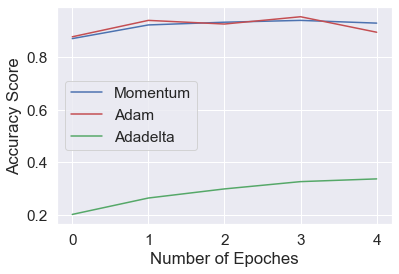

In [70]:
import matplotlib.pylab as plt

#Since we keep the accuracy scores in each training session, now we can plot them on the same grid to compare.

plt.plot( val_momentum,'b',label='Momentum')
plt.plot( val_adam,'r',label='Adam')
plt.plot( val_adadelta,'g',label='Adadelta')
plt.xlabel("Number of Epoches")
plt.ylabel("Accuracy Score")
plt.legend(loc='center left',fancybox=True)
plt.show()


<b> Observations </b>

I created three different method for training my network by using different optimizers.Momentum, Adam and Adadelta.As it can also be seen in the animation above each optimization type tries to find the minimum cost point on the surface.First Adadelta ( yellow line ) reaches the minima, and then the others reaches the minima.So, I collected accuracy scores for each type of optimization per epoch while training.And then I plotted the above graph.We can see that, as the number of epoches increases, network which was using the Adadelta optimizer increasing in it's accuracy score.Momentum is also increasing but it is constant for a while, so it makes the job of finding minima a bit slower.And for the Adam, first it increased and then it decreased, so again it will take a bit time to get the best accuracy or minima.Finally, we can say that our inspection matches with the animation.